After reading the provided description for the project I can determine that we are dealing with a task, where I will need to use Supervised Machine Leaning techniques. This is due to the fact that Supervised    Machine Learning is when we attempt to well approximate our mapping function in an aim to be able to predict the output variable with new input data. The provided data frame as follows:
Input data:
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminium
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron 
Output data:
11. Type of glass: (class attribute)
    1 building windows float processed
    2 building windows non float processed
    3 vehicle windows floats processed
    4 vehicle windows non float processed (none in this database)
    5 containers
    6 tableware
    7 headlamps



I have imported libraries that possibly will be needed for my project. 

In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics                           
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from numpy import where
from collections import Counter
import time
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap  
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import SGD

EDA

In [2]:
df = pd.read_csv('glass_data.csv')

In [3]:
df.head(5)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


   After the first observation I could see that we have no header in the dataset, which would possibly not cause any problem, however I created a new dataset for the ease of reading. 

In [4]:
df_header = pd.read_csv('glass_data.csv', names=["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"])

In [5]:
df_header.head(5)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [7]:
df_header.shape

(214, 11)

In [8]:
df_header.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
df_header.isna().sum()

ID      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Further observation shows that our dataset is numeric, has 214 rows, 11 columns and has no missing values. All variables are numerical, which is the right format regarding the tasks given, as a Neural network would only work with numerical values. The first and last columns are containing whole numbers. The first column is containing an ID number for each observation which is a redundant information for my task as it has no affect on my label. I shall be creating a new dataset ‘df_noid’ without this redundant feature.
   The describe function of Pandas can already give important information about our features, as the min-max values, standard deviation and the mean. These can be helpful with our preparation and also point already to some direction for the feature selection.


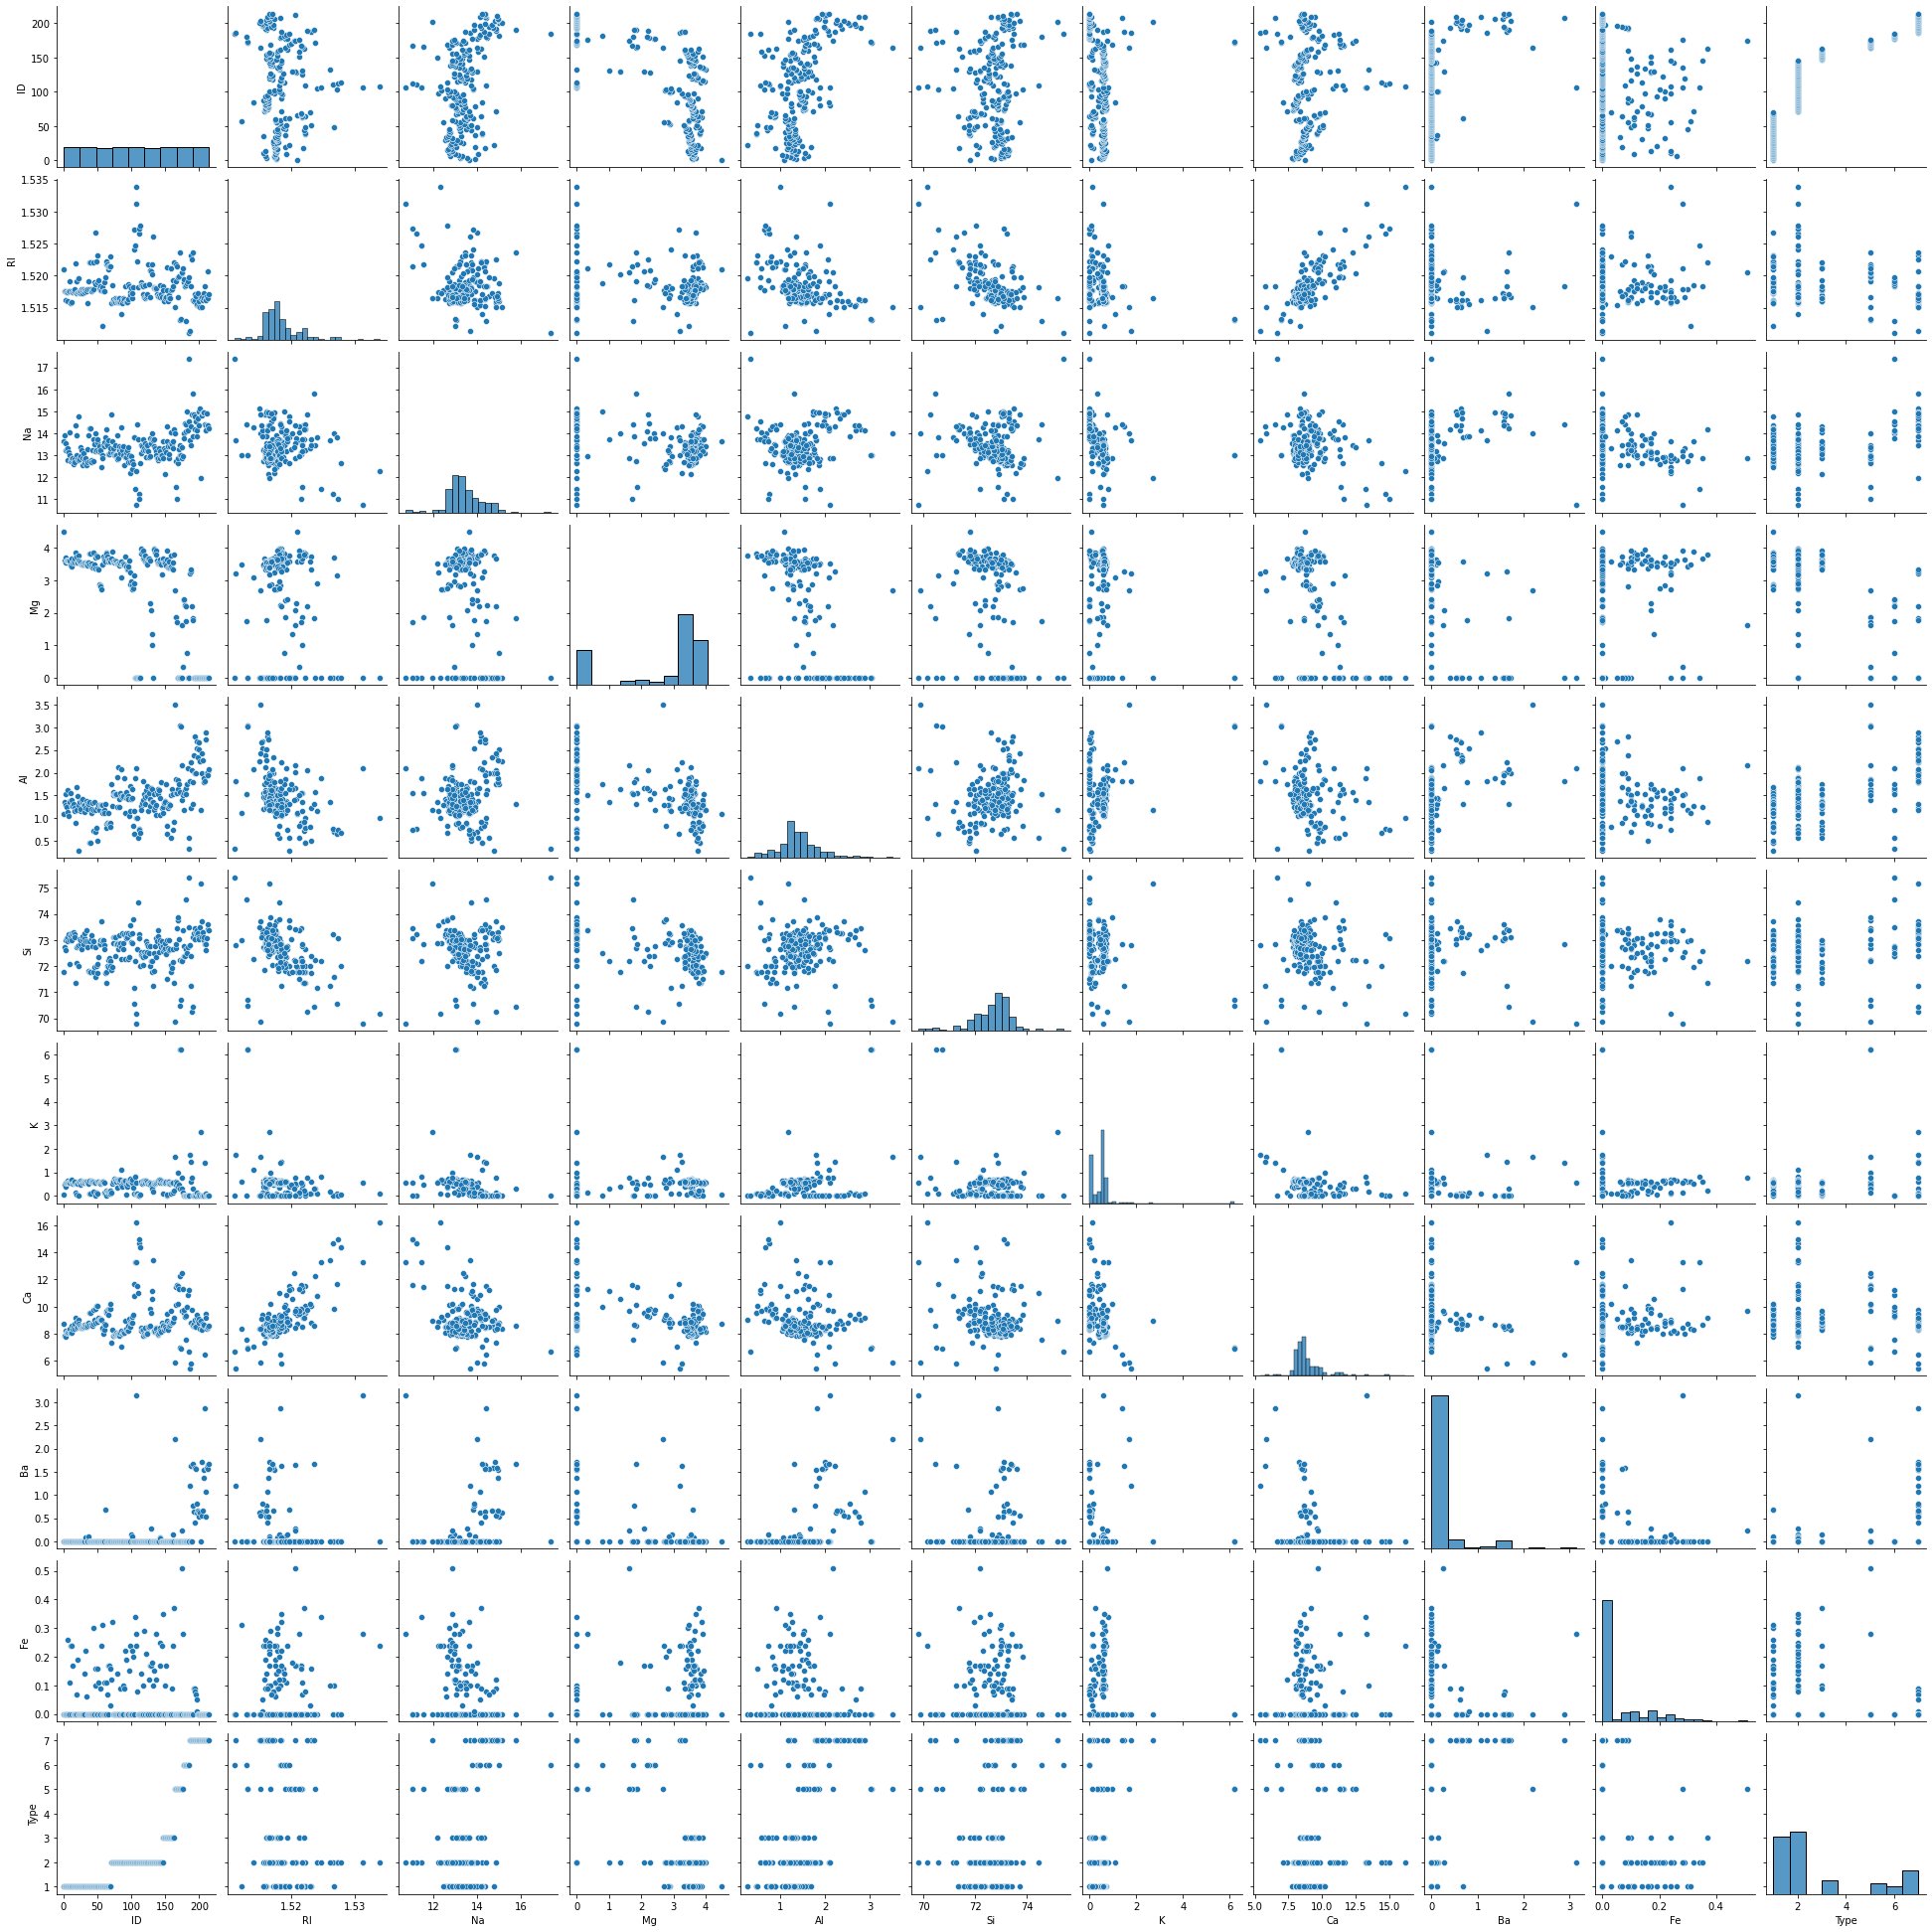

In [10]:
sns.pairplot(df_header)

C:\Users\Machine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


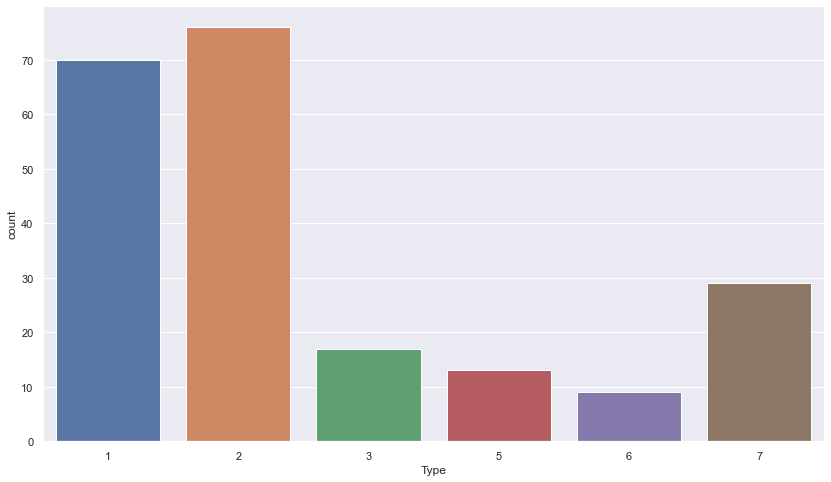

In [11]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.countplot(df_header['Type']) 

In [12]:
df_header['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

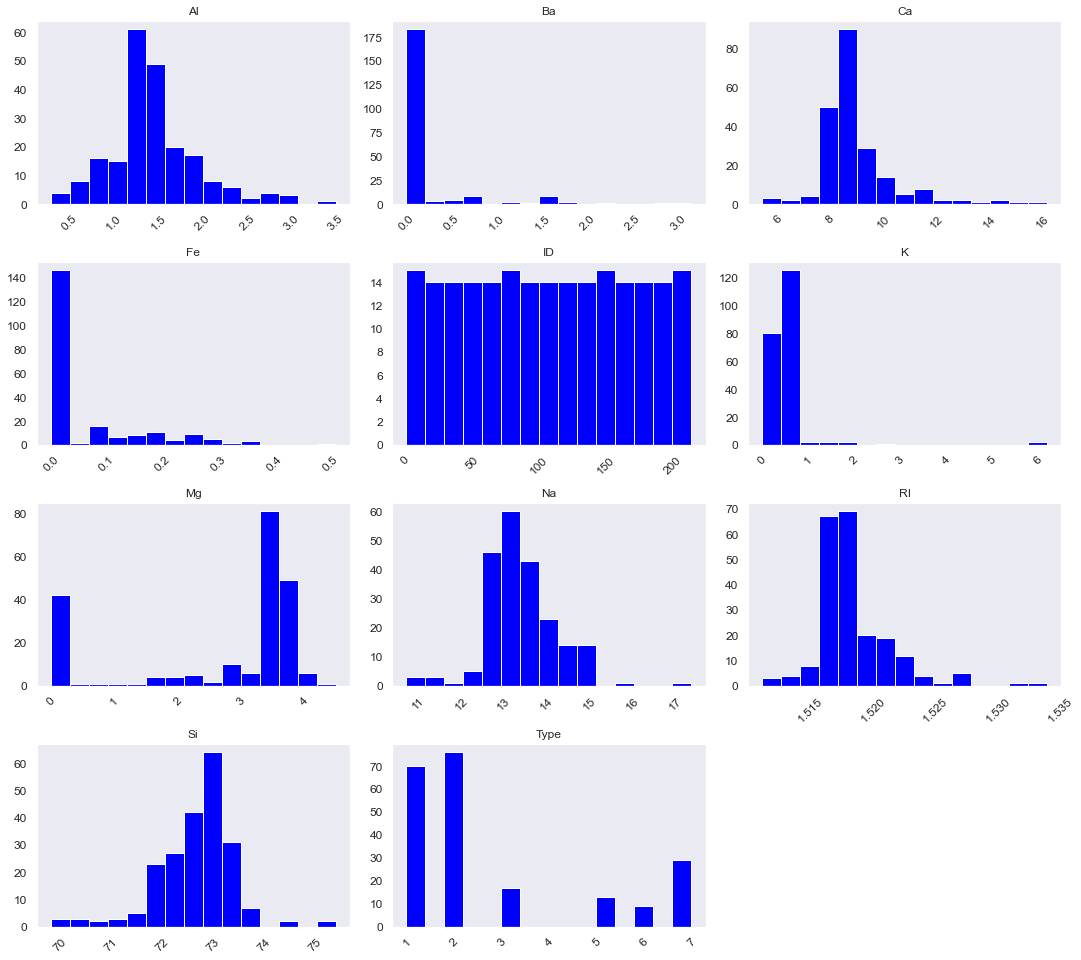

In [13]:
fig = df_header.hist(bins=15, color='blue', edgecolor='white', linewidth=1.0, xlabelsize=12, ylabelsize=12, xrot=45, yrot=0, figsize=(10,9), grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))

In [14]:
df_noid = df_header.drop(df_header.columns[[0]],axis = 1)

   I used pair-plot to get some visual information about the dataset. The plot can show us possible correlations and the distribution of the features. I can already see some correlation and also some feature distributions that might can indicate the importance of the features.
   I created a count-plot for the target variable to see the distribution of it values. I also performed a value count and the 2 techniques clearly pointed out that there is no value 4 (vehicle windows non float processed), as the given description stated.
   I can determine also, that I am dealing with a single label multi-class classification problem here, as there is 1 label column in the dataset that is divided the multiple classes of possible outcome, therefore the outcome can be either of the 6 given glass type individually but not 2 or more at once . After some research I found that these types of problems have many popular algorithms to deal with, such as k-Nearest Neighbors(kNN), Decision Trees, Random Forest, Gradient Boosting etc… Therefore, I shall be utilizing some of these in an aim to get highly accurate predictions (Jason Brownlee, 2020).


Finding Important Features

My next task is to find the important features within the dataset, so I can make it less redundant and I also can achieve more accuracy with my models.
   For this task, I shall be splitting and scaling my dataset for training and testing. It is good practice to scale our input data, due to the facts the unscaled data can quickly go large and the algorithms would lean towards the higher values and also the network can easily become unstable.
   A common splitting is 20% test size and 80% training size and therefore I shall be using this splitting. I am also using ‘random_state’, to ensure the generated splits shall be reproducible for assessment purposes. This way the random numbers shall be generated in similar order (Stackoverflow, n.d.).  I shall be using this on every model, where it is possible.


Scaling and splitting the data

In [15]:
X = df_noid.drop(['Type'], axis = 1)
Y = df_noid['Type']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, 
                                                    random_state = 101)

   I will be using Random Forest Classifier, Decision Tree Classifier, Correlation Matrix Analysis and LassoCV for to determine the most important features. It might seem as a bit of overdoing; however, I would like to aim for the most objective decision and getting opinion from 4 models would be great aid.

Random Forest Classifier

Random Forest has a great advantage as it is versatile. It can be utilized for both regression and classification problems. This model offers better result with it working method, where rather than searching for the most important features, it aims its search of the best feature within the random subset of the features. The model also good for preventing overfitting if there are enough trees in the forest (Donges, 2019). I run 4 different models here, first with all the features of my ‘df_noid’ dataset.  The accuracy was 72%, which is not that bad actually, however I aimed for better results. I plotted the 7 most important features regarding to the model, which are: K, Ba, Na, Ca, RI, Mg, Al.
   I run than 3 model with reduced features to find out if there is any improvement using any of the selections. First run it with the top 4 features, then with another top 4 features that my Decision Tree Classifier advised (see later) and finally with the top 6 features that Random Forest gave.


In [16]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

0.9984064000000004
[[15  3  0  0  0  0]
 [ 1  9  0  0  0  0]
 [ 2  2  2  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.53      0.90      0.67        10
           2       1.00      0.33      0.50         6
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         2
           5       1.00      0.67      0.80         3

    accuracy                           0.74        43
   macro avg       0.89      0.71      0.74        43
weighted avg       0.82      0.74      0.74        43



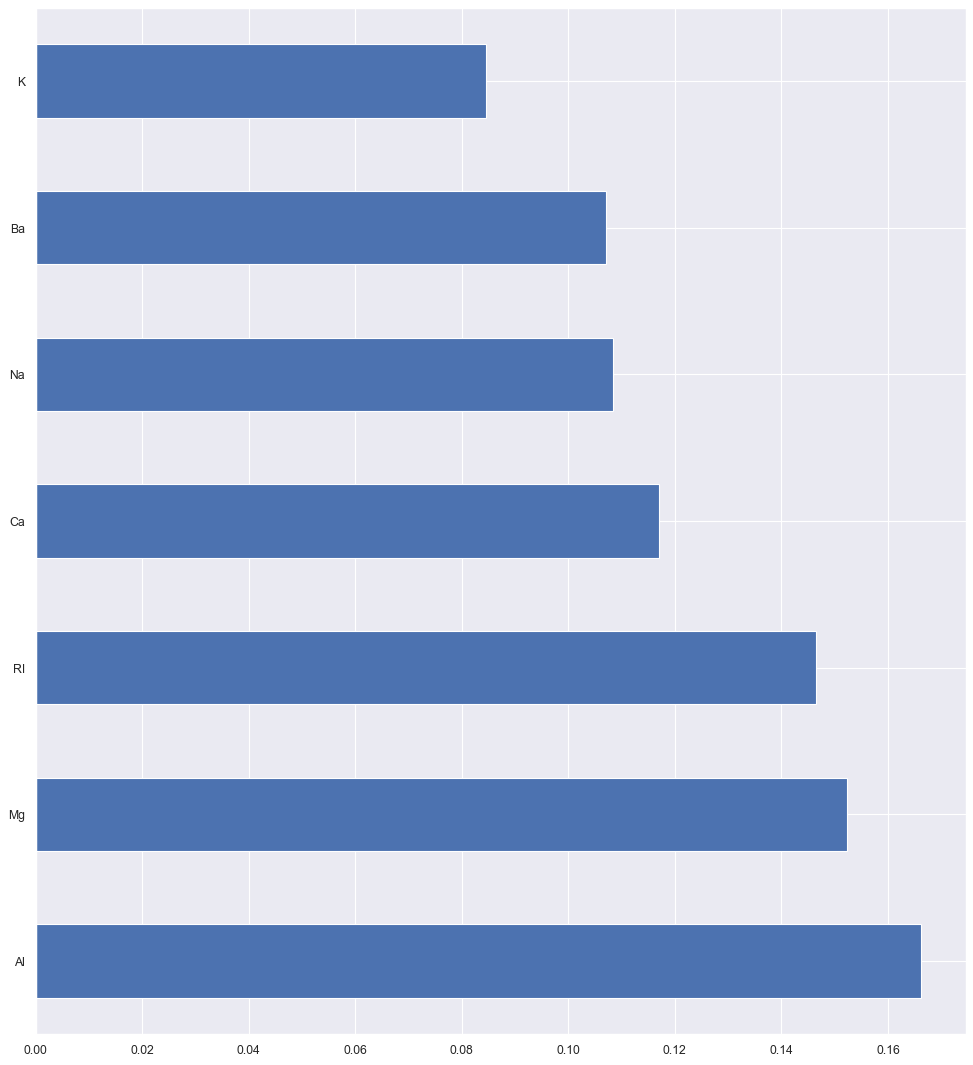

In [17]:
figure(num=None, figsize=(15, 17), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(trainedforest.feature_importances_, index= df_noid.drop(['Type'], axis = 1).columns)
feat_importances.nlargest(7).plot(kind='barh')

Checking accuracy with reduced dataset

In [18]:
X_Reduced = df_noid[['Al','Mg','RI','Ca']]
X_Reduced = StandardScaler().fit_transform(X_Reduced)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_Reduced, Y, test_size = 0.30, 
                                                        random_state = 101)

start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train2,Y_Train2)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionforest))
print(classification_report(Y_Test2,predictionforest))

0.9672061999999997
[[25  2  0  0  0  0]
 [ 2 13  0  1  0  0]
 [ 3  4  2  0  0  0]
 [ 0  0  0  4  0  1]
 [ 0  0  0  1  3  0]
 [ 1  1  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        27
           1       0.65      0.81      0.72        16
           2       1.00      0.22      0.36         9
           3       0.67      0.80      0.73         5
           4       1.00      0.75      0.86         4
           5       0.67      0.50      0.57         4

    accuracy                           0.75        65
   macro avg       0.80      0.67      0.68        65
weighted avg       0.79      0.75      0.73        65



Checking accuracy with another reduced dataset

In [19]:
X_Reduced2 = df_noid[['Al','Mg','Ba','Na']]
X_Reduced2 = StandardScaler().fit_transform(X_Reduced2)
X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_Reduced2, Y, test_size = 0.30, 
                                                        random_state = 50)

start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train3,Y_Train3)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionforest))
print(classification_report(Y_Test3,predictionforest))

0.9516060999999993
[[14  1  3  0  0  1]
 [ 3 20  1  0  0  0]
 [ 4  1  0  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  1  0  0  2  0]
 [ 0  1  0  0  1  7]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        19
           1       0.80      0.83      0.82        24
           2       0.00      0.00      0.00         5
           3       1.00      0.80      0.89         5
           4       0.67      0.67      0.67         3
           5       0.88      0.78      0.82         9

    accuracy                           0.72        65
   macro avg       0.67      0.64      0.65        65
weighted avg       0.72      0.72      0.72        65



Checking accuracy with a 3rd reduced dataset

In [20]:
X_Reduced3 = df_noid[['Al','Mg','Ba','Na','RI','Ca']]
X_Reduced3 = StandardScaler().fit_transform(X_Reduced3)
X_Train4, X_Test4, Y_Train4, Y_Test4 = train_test_split(X_Reduced3, Y, test_size = 0.30, 
                                                        random_state = 70)

start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train4,Y_Train4)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test4)
print(confusion_matrix(Y_Test4,predictionforest))
print(classification_report(Y_Test4,predictionforest))

0.9516061000000064
[[26  2  1  0  0  0]
 [ 4 10  0  1  1  0]
 [ 1  0  4  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  1  8]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.83      0.62      0.71        16
           2       0.80      0.80      0.80         5
           3       0.80      1.00      0.89         4
           4       0.50      1.00      0.67         2
           5       1.00      0.89      0.94         9

    accuracy                           0.83        65
   macro avg       0.80      0.87      0.81        65
weighted avg       0.84      0.83      0.83        65



With regards the result I can conclude that almost all model with reduced features are either improved the accuracy or the progressing time. However, the best result was given by the model where the top 6 features were fed in, with almost 10 percent improvement on the accuracy. Also, worth to mention that I set the ‘n_estimators ‘to 700 initially, what determines the number of trees we want to build before taking the maximum voting of the predictions. Higher the number, the better the performance going to be.  However, it can slow the code and need to be careful as the number of trees are not limited that the processor can bear with (Analytics Vidhya, 2019). 

DecisionTreeClassifier

   I fed the previously trained data into my Decision Tree model with the same 3 previously observed reduced feature selections. I could make the same observation in this model that the most accurate selection is the top 6 featured one from Random Forest’s preference.

In [21]:
start = time.process_time()
trainedtree = tree.DecisionTreeClassifier().fit(X_Train2, Y_Train2)
print(time.process_time() - start)
predictionstree = trainedtree.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionstree))
print(classification_report(Y_Test2,predictionstree))

0.0
[[22  2  3  0  0  0]
 [ 1 13  1  0  1  0]
 [ 1  5  3  0  0  0]
 [ 0  0  0  3  1  1]
 [ 1  2  0  1  0  0]
 [ 1  1  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.57      0.81      0.67        16
           2       0.43      0.33      0.38         9
           3       0.75      0.60      0.67         5
           4       0.00      0.00      0.00         4
           5       0.67      0.50      0.57         4

    accuracy                           0.66        65
   macro avg       0.54      0.51      0.52        65
weighted avg       0.65      0.66      0.65        65



In [22]:
start = time.process_time()
trainedtree2 = tree.DecisionTreeClassifier().fit(X_Train3, Y_Train3)
print(time.process_time() - start)
predictionstree2 = trainedtree2.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionstree2))
print(classification_report(Y_Test3,predictionstree2))

0.0
[[12  3  3  0  0  1]
 [ 3 21  0  0  0  0]
 [ 3  0  2  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  2  0  0  1  0]
 [ 0  1  0  0  1  7]]
              precision    recall  f1-score   support

           0       0.67      0.63      0.65        19
           1       0.75      0.88      0.81        24
           2       0.40      0.40      0.40         5
           3       1.00      0.80      0.89         5
           4       0.50      0.33      0.40         3
           5       0.88      0.78      0.82         9

    accuracy                           0.72        65
   macro avg       0.70      0.64      0.66        65
weighted avg       0.72      0.72      0.72        65



In [23]:
start = time.process_time()
trainedtree3 = tree.DecisionTreeClassifier().fit(X_Train4, Y_Train4)
print(time.process_time() - start)
predictionstree3 = trainedtree3.predict(X_Test4)
print(confusion_matrix(Y_Test4,predictionstree3))
print(classification_report(Y_Test4,predictionstree3))

0.0
[[19  5  4  0  0  1]
 [ 3  9  1  1  2  0]
 [ 1  1  3  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  1  0  1  0]
 [ 0  0  0  0  1  8]]
              precision    recall  f1-score   support

           0       0.83      0.66      0.73        29
           1       0.60      0.56      0.58        16
           2       0.33      0.60      0.43         5
           3       0.80      1.00      0.89         4
           4       0.25      0.50      0.33         2
           5       0.89      0.89      0.89         9

    accuracy                           0.68        65
   macro avg       0.62      0.70      0.64        65
weighted avg       0.72      0.68      0.69        65



Correlation Matrix Analysis

I built my correlation matrix visualization next. This is also a very useful tool with regards of finding the important features, that are affecting the target variable. The visualization is easy to read and easy to understand. I also printed out all features, where the value of correlation is higher than 0.3, so the correlation is considerably high.
  All features printed were part of the selection of the Random Forrest model earlier and this particular selection was run there also, as I mentioned before.

In [24]:
df_noid.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [25]:
corr= df_noid.corr()
corr_y = abs(corr["Type"])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)

Na      0.502898
Ba      0.575161
Al      0.598829
Mg      0.744993
Type    1.000000
Name: Type, dtype: float64

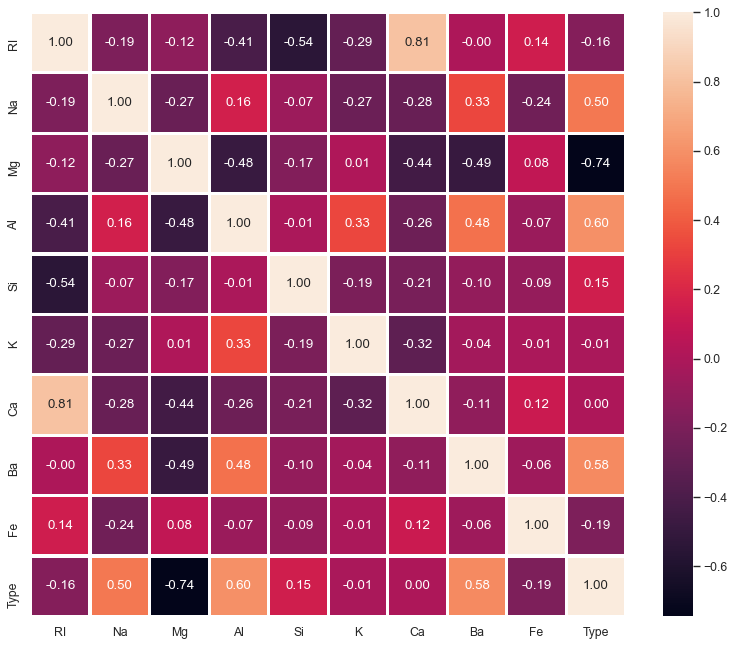

In [26]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(df_noid.corr(), annot=True, fmt='.2f', linewidths=2)

LassoCV

  LassoCV is a type of linear regression models and usually good to use, where 1 predictor variable can be used to predict another one (multicollinearity)(Stephanie, 2015). However, in this particular case I am utilizing this model to help me reduce the number of features. The model eliminated 3 features from the original 9 in ‘df_noid’.  The top 4 features here matched what we have seen in the correlation matrix earlier. The alpha score is 0.082, which happened to be quiet low. Usually with an increment of the testing size it could be improved (Tavakol and Dennick, 2011). However, looking at the training and testing data accuracy, I can conclude that the lower testing accuracy than the training one can indicate overfitting.

In [27]:
from sklearn.linear_model import LassoCV

regr = LassoCV(cv=5, random_state=102)
regr.fit(X_Train,Y_Train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Training Accuracy: ", regr.score(X_Train, Y_Train))
print("LassoCV Model Test Accuracy: ", regr.score(X_Test, Y_Test))
model_coef = pd.Series(regr.coef_, index = list(df_noid.columns[:9]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0))) 

LassoCV Best Alpha Scored:  0.08261560743362878
LassoCV Model Training Accuracy:  0.7355753925793967
LassoCV Model Test Accuracy:  0.633316779578295
Variables Eliminated:  3
Variables Kept:  6


Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

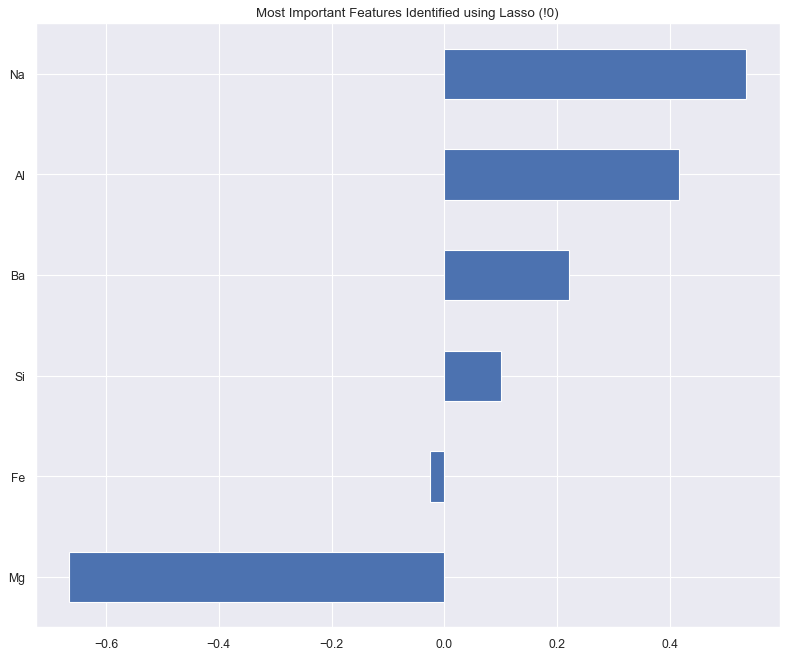

In [28]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values()
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")

I created a new dataset with the important features that the previous models pointed to. I made the decision that I will be keeping 6 features out of the 9 in 'df_noid'.

In [29]:
df_resized = df_noid.drop(df_noid.columns[[4,5,8]],axis = 1)

In [30]:
df_resized.head()

,RI,Na,Mg,Al,Ca,Ba,Type
0,1.52101,13.64,4.49,1.10,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,8.07,0.0,1


The descriptor highlighted that the main task is to create and implement Dense Neural Network, however before I would start to build one, I decided to try some simple algorithms to see if I these would have an accurate result and prediction. 

  As I highlighted before, Decision Tree Models are good with classifications, therefore this was 1 of the simple models that I wanted to see how it performs with my original ‘df_noid’ and the new ‘df_resized’ datasets.

Decision Tree Model

I started with feature selection, slitting, then created a decision tree classifier object for both datasets. I trained the model, then predicted the response for the test datasets. After this I printed out the accuracy score for each model. In the end I made 3 predictions with each model for demonstration. The 2 models worked side by side at the demonstration, however looking at the accuracy score I could conclude that actually the model with the original ‘df_noid’ dataset worked with higher accuracy. Also, can mentioned that both models had a reasonably good score with 74% and 68%.

In [31]:
X = df_noid.drop(['Type'], axis = 1)
y = df_noid['Type'] 
X, y

(          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
 0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
 1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
 2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
 3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
 4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
 ..       ...    ...   ...   ...    ...   ...   ...   ...  ...
 209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
 210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
 211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
 212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
 213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0
 
 [214 rows x 9 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 209    7
 210    7
 211    7
 212    7
 213    7
 Name: Type, Length: 214, dtype: int64)

In [32]:
X2 = df_resized.drop(['Type'], axis = 1)
y2 = df_resized['Type'] 
X2, y2

(          RI     Na    Mg    Al    Ca    Ba
 0    1.52101  13.64  4.49  1.10  8.75  0.00
 1    1.51761  13.89  3.60  1.36  7.83  0.00
 2    1.51618  13.53  3.55  1.54  7.78  0.00
 3    1.51766  13.21  3.69  1.29  8.22  0.00
 4    1.51742  13.27  3.62  1.24  8.07  0.00
 ..       ...    ...   ...   ...   ...   ...
 209  1.51623  14.14  0.00  2.88  9.18  1.06
 210  1.51685  14.92  0.00  1.99  8.40  1.59
 211  1.52065  14.36  0.00  2.02  8.44  1.64
 212  1.51651  14.38  0.00  1.94  8.48  1.57
 213  1.51711  14.23  0.00  2.08  8.62  1.67
 
 [214 rows x 6 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 209    7
 210    7
 211    7
 212    7
 213    7
 Name: Type, Length: 214, dtype: int64)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 38)

In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size= 0.3, random_state= 35)

In [35]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [36]:
clf2 = DecisionTreeClassifier()

clf2 = clf2.fit(X_train2,y_train2)

y_pred2 = clf2.predict(X_test2)

In [37]:
score = metrics.accuracy_score(y_test, y_pred)

print("Accuracy {:.2f}".format(score))

Accuracy 0.78


In [38]:
score2 = metrics.accuracy_score(y_test2, y_pred2)

print("Accuracy {:.2f}".format(score2))

Accuracy 0.71


Below predicting index: 1(1)

In [39]:
clf.predict([[1.51761, 13.89, 3.60, 1.36, 72.73, 0.48, 7.83, 0.0, 0.0]])

array([1], dtype=int64)

In [40]:
clf2.predict([[1.51761, 13.89, 3.60, 1.36, 7.83, 0.0]])

array([1], dtype=int64)

Below predicting index:191(7)

In [41]:
clf.predict([[1.51602, 14.85, 0.00, 2.38, 73.28, 0.00, 8.76, 0.64, 0.09]])

array([7], dtype=int64)

In [42]:
clf2.predict([[1.51602, 14.85, 0.00, 2.38, 8.76, 0.64]])

array([7], dtype=int64)

Below predicting index: 4(1)

In [43]:
clf.predict([[1.51742, 13.27, 3.62, 1.24, 73.08, 0.55, 8.07, 0.0, 0.0]])

array([1], dtype=int64)

In [44]:
clf2.predict([[1.51742, 13.27, 3.62, 1.24, 8.07, 0.0]])

array([1], dtype=int64)

Random Forest

I also described the Random Forest model previously, therefore it is needless to say if I would try Decision Tree, I would certainly would build a Random Forrest also. I went through again on feature selection, splitting training, accuracy print and also made 3 predictions with both models. I again used the previously used 2 datasets to see how the accuracy would differ from the decision tree ones. There was indeed some difference, the latter model with the new resized dataset performed almost with a 10% higher accuracy of 86% compare with the model using the original ‘df_noid’ dataset, what had 77% accuracy. The demonstration of the predictions although were exactly with the same good results. 

In [45]:
X = df_noid.drop(['Type'], axis = 1)
y = df_noid['Type'] 

In [46]:
X2 = df_resized.drop(['Type'], axis = 1)
y2 = df_resized['Type'] 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=33)

In [49]:
clf=RandomForestClassifier(n_estimators=500)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [50]:
clf2=RandomForestClassifier(n_estimators=500)

clf2.fit(X_train2,y_train2)

y_pred2=clf2.predict(X_test2)

In [51]:
score_R = metrics.accuracy_score(y_test, y_pred)

print("Accuracy {:.2f}".format(score_R))

Accuracy 0.77


In [52]:
score_R2 = metrics.accuracy_score(y_test2, y_pred2)

print("Accuracy {:.2f}".format(score_R2))

Accuracy 0.86


Below predicting index:1 (1)

In [53]:
clf.predict([[1.51761, 13.89, 3.60, 1.36, 72.73, 0.48, 7.83, 0.0, 0.0]])

array([1], dtype=int64)

In [54]:
clf2.predict([[1.51761, 13.89, 3.60, 1.36, 7.83, 0.0]])

array([1], dtype=int64)

Below predicting index: 191 (7)

In [55]:
clf.predict([[1.51602, 14.85, 0.00, 2.38, 73.28, 0.00, 8.76, 0.64, 0.09]])

array([7], dtype=int64)

In [56]:
clf2.predict([[1.51602, 14.85, 0.00, 2.38,8.76, 0.64]])

array([7], dtype=int64)

Below predicting index: 4 (1)

In [57]:
clf.predict([[1.51742, 13.27, 3.62, 1.24, 73.08, 0.55, 8.07, 0.0, 0.0]])

array([1], dtype=int64)

In [58]:
clf2.predict([[1.51742, 13.27, 3.62, 1.24, 8.07, 0.0]])

array([1], dtype=int64)

Ridge Regression

My next model is the Ridge Regression, which is somewhere referred as the regularized form of the linear regressing. This model also good for classification problems and usually performs better than a simple regression model. Although my models are not complex either. I built 2 models, with starting the same way as always with feature selection. Next, I set the alpha of my regression. Alpha here is not a random parameter and is used to tune the models. In a way it is controlling the amount of the Bi significance. Both models are fed with the new resized dataset this time with 0.5 alpha setting on the first model and 0.3 alpha with my second model (can be set between 0-1) (Stack Overflow, n.d.).
I then fit and trained my models which was followed by the printing of the accuracy. With regards of this the first model indeed was far better, as the accuracy both on train and test was high enough and there was no sign of under or overfitting.  The second model with the smaller alpha value however had a significant difference between the 2 sets of accuracy and the test score was quite low, what would usually indicate overfitting. 
The actual demonstration of the predictions gave mixed results as both models performed the same with 2 matches out of 3. 
I can although conclude that the first ridge regression model has the best result among the models where training and testing was implemented.


In [59]:
features = df_resized.drop(['Type'], axis = 1)
target = df_resized['Type']

regression = Ridge(alpha=0.5)

model = regression.fit(features, target)

In [60]:
features2 = df_resized.drop(['Type'], axis = 1)
target2 = df_resized['Type']

regression2 = Ridge(alpha=0.3)

model2 = regression2.fit(features2, target2)

In [61]:
X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [62]:
X2 = features2
y2 = target2

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=10)

In [63]:
ridge = Ridge().fit(X_train, y_train)

In [64]:
ridge2 = Ridge().fit(X_train2, y_train2)

In [65]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.72
Test set score: 0.75


In [66]:
print("Training set score: {:.2f}".format(ridge2.score(X_train2, y_train2)))
print("Test set score: {:.2f}".format(ridge2.score(X_test2, y_test2)))

Training set score: 0.78
Test set score: 0.59


In [67]:
Predicted_Value = model.predict(features)[130]
Predicted_Value.round()

4.0

In [68]:
Target_Value = target[130]
Target_Value

2

In [69]:
Predicted_Value = model.predict(features)[50]
Predicted_Value.round()

1.0

In [70]:
Target_Value = target[50]
Target_Value

1

In [71]:
Predicted_Value = model.predict(features)[170]
Predicted_Value.round()

5.0

In [72]:
Target_Value = target[170]
Target_Value

5

In [73]:
Predicted_Value2 = model2.predict(features2)[130]
Predicted_Value2.round()

4.0

In [74]:
Target_Value2 = target2[130]
Target_Value2

2

In [75]:
Predicted_Value2 = model2.predict(features2)[50]
Predicted_Value2.round()

1.0

In [76]:
Target_Value2 = target2[50]
Target_Value2

1

In [77]:
Predicted_Value2 = model2.predict(features2)[170]
Predicted_Value2.round()

5.0

In [78]:
Target_Value2 = target2[170]
Target_Value2

5

My next set of models are done with KNN. K-nearest neighbors is a supervised machine learning algorithm.  It is quite easy to implement as there is no specific training technique. It has no assumption regarding the underlying so it makes it an easy to implement to real word problems. Our dataset is not a large one, therefore we do not need to worry about the cons of the algorithm, which are the issues with dealing with high dimensional data and also the high prediction cost due to the large size (Robinson, 2018).  
I started again with feature selection, however here I had to shape my features and my label to have them in 1d array format as the model requires. Then I split to train and test my data with 20% testing and 80% training split, as this is a quiet common way. Then I scaled the data as I explained earlier, it is good practice to scale our input data, due to the facts the unscaled data can quickly go large and the algorithms would lean towards the higher values and also the network can easily become unstable.
I then set the ‘n_neighbors’ what is actually the setting for the learning based on the number of nearest neighbours we set. I initially started with 5.
After this I fit my model and set my prediction, what followed by the evaluation of the algorithm. The accuracy was 72%. I then made 3 predictions, however only 1 was an accurate one. 
I decided to tune my model by changing the ‘n_neighbors’ to 7. I run the same steps, even I completely recalled my data, to prevent training the trained dataset. This time the accuracy actually dropped and the prediction it made was 1 out of 2. I made the decision to try the model with less ‘n_neighbors’ again and I set it to 3. The accuracy grew to 77% this time, however the prediction resulted the same way as the previous model with 1 out of 2.
My conclusion is that the most accurate model was with the 3 ‘n_neighbors’ setting, what is actually interesting although I know that too many ‘n_neighbors’ would take it noise what can caure the accuracy to drop.


KNN

In [79]:
dataset = df_resized

In [80]:
dataset.head()

,RI,Na,Mg,Al,Ca,Ba,Type
0,1.52101,13.64,4.49,1.10,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,8.07,0.0,1


In [81]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 6].values

In [82]:
X2 = dataset.iloc[:, :-1].values
y2 = dataset.iloc[:, 6].values

In [83]:
X3 = dataset.iloc[:, :-1].values
y3 = dataset.iloc[:, 6].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [85]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=15)

In [86]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=45)

In [87]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
scaler2 = StandardScaler()
scaler2.fit(X_train2)

X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [89]:
scaler3 = StandardScaler()
scaler3.fit(X_train3)

X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)

In [90]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
classifier2 = KNeighborsClassifier(n_neighbors=7)
classifier2.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=7)

In [92]:
classifier3 = KNeighborsClassifier(n_neighbors=3)
classifier3.fit(X_train3, y_train3)

KNeighborsClassifier(n_neighbors=3)

In [93]:
y_pred = classifier.predict(X_test)

In [94]:
y_pred2 = classifier2.predict(X_test2)

In [95]:
y_pred3 = classifier3.predict(X_test3)

Evaluating the Algorithm

In [96]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  3  1  0  0  0]
 [ 2 12  0  1  0  0]
 [ 2  0  0  0  0  0]
 [ 0  0  0  0  0  1]
 [ 1  0  0  0  1  0]
 [ 0  0  0  0  1  6]]
              precision    recall  f1-score   support

           1       0.71      0.75      0.73        16
           2       0.80      0.80      0.80        15
           3       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.50      0.50      0.50         2
           7       0.86      0.86      0.86         7

    accuracy                           0.72        43
   macro avg       0.48      0.48      0.48        43
weighted avg       0.70      0.72      0.71        43



In [97]:
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[10  3  0  0  0  0]
 [ 7 10  1  0  1  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  1  1  0  1]
 [ 0  1  0  0  0  4]]
              precision    recall  f1-score   support

           1       0.59      0.77      0.67        13
           2       0.71      0.53      0.61        19
           3       0.00      0.00      0.00         0
           5       0.67      0.67      0.67         3
           6       0.00      0.00      0.00         3
           7       0.67      0.80      0.73         5

    accuracy                           0.60        43
   macro avg       0.44      0.46      0.44        43
weighted avg       0.62      0.60      0.60        43



C:\Users\Machine\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
print(confusion_matrix(y_test3, y_pred3))
print(classification_report(y_test3, y_pred3))

[[11  2  0  0  0  0]
 [ 3 14  1  0  0  0]
 [ 1  0  1  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 1  0  0  0  2  5]]
              precision    recall  f1-score   support

           1       0.69      0.85      0.76        13
           2       0.88      0.78      0.82        18
           3       0.50      0.50      0.50         2
           5       1.00      1.00      1.00         1
           6       0.33      1.00      0.50         1
           7       1.00      0.62      0.77         8

    accuracy                           0.77        43
   macro avg       0.73      0.79      0.73        43
weighted avg       0.81      0.77      0.78        43



In [99]:
Predicted_Value = classifier.predict(X)[50]
Predicted_Value

2

In [100]:
Target_Value = y[50]
Target_Value

1

In [101]:
Predicted_Value = classifier.predict(X)[130]
Predicted_Value

2

In [102]:
Target_Value = y[130]
Target_Value

2

In [103]:
Predicted_Value = classifier.predict(X)[190]
Predicted_Value

2

In [104]:
Target_Value = y[190]
Target_Value

7

Model 2 prediction check

In [105]:
Predicted_Value2 = classifier2.predict(X2)[50]
Predicted_Value2

2

In [106]:
Target_Value2 = y2[50]
Target_Value2

1

In [107]:
Predicted_Value2 = classifier2.predict(X2)[100]
Predicted_Value2

2

In [108]:
Target_Value2 = y2[100]
Target_Value2

2

Model 3 prediction check

In [109]:
Predicted_Value3 = classifier3.predict(X3)[50]
Predicted_Value3

2

In [110]:
Target_Value3 = y3[50]
Target_Value3

1

In [111]:
Predicted_Value3 = classifier3.predict(X3)[100]
Predicted_Value3

2

In [112]:
Target_Value3 = y3[100]
Target_Value3

2

I have arrived to the real task to build a Dense Neural Network. I choose to build an Artificial Neural Network as it is very good to deal with tabular data, which I have. This is also known as feed-forward neural network.
As always, I started with my feature selection, then scaling my data with MinMaxScaler, which scales data to between 0-1 and I also transformed the date to achieve a format that the model will need.

Model1:
I split and trained my data with an initial 30% testing and 70% training. I used sequential as I wanted to build my model layer by layer. Firstly, I had 2 layers 1 input with the 6 input dims and the 1 output.
   I used the rectified linear activation function (ReLU) in the first layer, as I was seeking for an easier training method and the possible better performance. Historically all layers used the sigmoid and tanh activation functions, however ReLU proved to be more effective for many problems. 
  Models with higher number of layers can be less effective with sigmoid due to its vanishing gradient problem. ReLU can overcome on this particular problem.
   With linear activation function there are no transform applied. As mentioned, it is easy to train, however on of its cons is that it is not able to learn complex mapping functions.  However, for more complex structures I would also try to use sigmoid as it is great learning them easy.

I also used kernel_initializer settings, to have some initial weights set, this way I can have some assistance with regards to preventing exploding gradient problems. I firstly set this to normal what is centered the mean to 0 (Kapoor, 2020). 

For my output layer I used softmax activation, as it is good for multi-class classification problems and also can be inferred as a probability distribution (Ronaghan, 2019). Here a vector of values shall be the output what sums up to 1 and is a probability like output, there is also 1 node per class (Brownlee, 
2021). 

I used adam optimizer when I complied my model as it is proven to be the best in most cases.
I fitted my model, however at the evaluation it showed very poor performance.

Model1_2:
On my next model I increased the training data in an aim to achieve more accuracy. I also changed my loss function to categorical_crossentropy as it is a default loss function for multi-class classification. Other setting was the same and it gave similar poor results with 13.45
% training and 13.95% testing accuracy.

Model2:
I decided then to add an extra layer with 6 nodes, to see if the additional layer would give a better result. Strangely it resulted exactly the same as previously, possibly due to the weightings. 


Model2_2:
In the next models I decided to use binary_crossentropy as a loss function, this is a preferred technique with binary classifications and would use the sigmoid activation function as it requires the output layer to be configured with a single node (Brownlee, 2021). The outcome in one had seen a significant improvement, however the test accuracy was much higher than the training one, which should not be the case as we optimizing our model for literally the opposite (Stack Overflow, n.d.). 

Model3:
The 5th model has only 1 change again, to be able to see the affect properly. I changed the optimizer to SGD (Stochastic gradient descent), where Adam is said to be much faster, however SGD can overcome on convergence problems with slower speed (mediumnok, 2019). I also introduced the validation split at my model fitting, what actually evaluating the model performance on each epoch of the chosen validation dataset. The result is slightly worse than the previous model had as the 45.03% training accuracy and 37.21% testing accuracy would indicate overfitting, that might be caused by the validation split.

Model4:
With my next model I decided to change the learning rate in SGD to slightly higher value, from the traditionally default 0.1 or 0.01. This controls how fast the neural network would learn the problem. Although here we need to be careful as changing this to too high value can result the algorithm diverge and having it too low would result slow to converge (Wikipedia, 2020). I also removed the validation split to see if the overfitting signs would change. This resulted even higher indication of overfitting as my training accuracy grew but the testing one dropped further.

Model5:
With my next model I decided to go back to the default settings of SGD and reintroduce the validation split with a slightly higher rate than previously. I also changed the number of epochs from 150 to 100, therefore I reduced the number of times where the learning algorithm would work through the entire training dataset. The result was that my training accuracy dropped significantly, possibly due to the lowered epochs but the testing accuracy grew, what might be the cause of the higher validation split.

Model6:
I reviewed the previous model’s loss value change. I could conclude that the best model with regards loss value, was model3.  Therefore, I decided to have similar tuning, only setting the number of epoch higher. The result was a drastic one, both accuracies had significant drop testing being below 10%.

Model7:
With my last model, I decided to add an extra layer to see if there was any impact to the accuracies of the model. I also had my epochs set to 200, as I seen that caused positive change before. The result was higher accuracy for both testing and training, although the testing accuracy had a higher value again, which should be not the case.


Conclusion:
Finally, I had a look of the prediction of each model, that were generated. It seems that models with the less accuracies performed better with regard of demonstrating the predictions.
I can make the conclusion that the dataset used was not for my models, as although I made several attempts to make my models more accurate, they never rose their accuracy over 50%. I can also conclude that the best model regarding accuracy was my Random Forrest model, which gave 86% accuracy with regards its predictions. Decision Tree and Ridge Regression were also accurate enough. Even KNN was giving 60-77% accuracy within the models. Although the task was to build a Dense Neural Network, its classification model did not suit the purpose. I would possibly try to see how a regression model would perform after seeing the results. 



ANN

In [113]:
X = df_resized.drop(['Type'], axis = 1).values
y = df_resized['Type'].values

In [114]:
X1 = df_resized.drop(['Type'], axis = 1).values
y1 = df_resized['Type'].values

In [115]:
X2 = df_resized.drop(['Type'], axis = 1).values
y2 = df_resized['Type'].values

In [116]:
X3 = df_resized.drop(['Type'], axis = 1).values
y3 = df_resized['Type'].values

In [117]:
X4 = df_resized.drop(['Type'], axis = 1).values
y4 = df_resized['Type'].values

In [118]:
X5 = df_resized.drop(['Type'], axis = 1).values
y5 = df_resized['Type'].values

In [119]:
X6 = df_resized.drop(['Type'], axis = 1).values
y6 = df_resized['Type'].values

In [120]:
X7 = df_resized.drop(['Type'], axis = 1).values
y7 = df_resized['Type'].values

In [121]:
X8 = df_resized.drop(['Type'], axis = 1).values
y8 = df_resized['Type'].values

In [122]:
y=np.reshape(y, (-1,1))
scaler_x=MinMaxScaler()
scaler_y=MinMaxScaler()
print(scaler_x.fit(X))
xscale=scaler_x.transform(X)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler()
MinMaxScaler()


In [123]:
y1=np.reshape(y1, (-1,1))
scaler_x1=MinMaxScaler()
scaler_y1=MinMaxScaler()
print(scaler_x1.fit(X1))
xscale1=scaler_x1.transform(X1)
print(scaler_y1.fit(y1))
yscale1=scaler_y1.transform(y1)

MinMaxScaler()
MinMaxScaler()


In [124]:
y2=np.reshape(y2, (-1,1))
scaler_x2=MinMaxScaler()
scaler_y2=MinMaxScaler()
print(scaler_x2.fit(X2))
xscale2=scaler_x2.transform(X2)
print(scaler_y2.fit(y2))
yscale2=scaler_y2.transform(y2)

MinMaxScaler()
MinMaxScaler()


In [125]:
y3=np.reshape(y3, (-1,1))
scaler_x3=MinMaxScaler()
scaler_y3=MinMaxScaler()
print(scaler_x3.fit(X3))
xscale3=scaler_x3.transform(X3)
print(scaler_y3.fit(y3))
yscale3=scaler_y3.transform(y3)

MinMaxScaler()
MinMaxScaler()


In [126]:
y4=np.reshape(y4, (-1,1))
scaler_x4=MinMaxScaler()
scaler_y4=MinMaxScaler()
print(scaler_x4.fit(X4))
xscale4=scaler_x4.transform(X4)
print(scaler_y4.fit(y4))
yscale4=scaler_y4.transform(y4)

MinMaxScaler()
MinMaxScaler()


In [127]:
y5=np.reshape(y5, (-1,1))
scaler_x5=MinMaxScaler()
scaler_y5=MinMaxScaler()
print(scaler_x5.fit(X5))
xscale5=scaler_x5.transform(X5)
print(scaler_y5.fit(y))
yscale5=scaler_y5.transform(y5)

MinMaxScaler()
MinMaxScaler()


In [128]:
y6=np.reshape(y6, (-1,1))
scaler_x6=MinMaxScaler()
scaler_y6=MinMaxScaler()
print(scaler_x6.fit(X6))
xscale6=scaler_x6.transform(X6)
print(scaler_y6.fit(y6))
yscale6=scaler_y6.transform(y6)

MinMaxScaler()
MinMaxScaler()


In [129]:
y7=np.reshape(y7, (-1,1))
scaler_x7=MinMaxScaler()
scaler_y7=MinMaxScaler()
print(scaler_x7.fit(X7))
xscale7=scaler_x7.transform(X7)
print(scaler_y7.fit(y7))
yscale7=scaler_y7.transform(y7)

MinMaxScaler()
MinMaxScaler()


In [130]:
y8=np.reshape(y8, (-1,1))
scaler_x8=MinMaxScaler()
scaler_y8=MinMaxScaler()
print(scaler_x8.fit(X8))
xscale8=scaler_x8.transform(X8)
print(scaler_y8.fit(y8))
yscale8=scaler_y8.transform(y8)

MinMaxScaler()
MinMaxScaler()


In [131]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.30, random_state=89)

In [132]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(xscale1, yscale1, test_size=0.20, random_state=79)

In [133]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(xscale2, yscale2, test_size=0.20, random_state=77)

In [134]:
X_train2_2, X_test2_2, y_train2_2, y_test2_2 = train_test_split(xscale3, yscale3, test_size=0.20, random_state=78)

In [135]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(xscale4, yscale4, test_size=0.20, random_state=67)

In [136]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(xscale5, yscale5, test_size=0.2, random_state=57)

In [137]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(xscale6, yscale6, test_size=0.20, random_state=47)

In [138]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(xscale7, yscale7, test_size=0.2, random_state=53)

In [139]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(xscale8, yscale8, test_size=0.20, random_state=87)

In [140]:
model1 = Sequential()
model1.add(Dense(10, input_dim=6, kernel_initializer='normal', activation="relu"))
model1.add(Dense(1, activation="softmax"))

In [141]:
model1_2 = Sequential()
model1_2.add(Dense(10, input_dim=6, kernel_initializer='normal', activation="relu"))
model1_2.add(Dense(1, activation="softmax"))

In [142]:
model2 = Sequential()
model2.add(Dense(10, input_dim=6, kernel_initializer='normal', activation="relu"))
model2.add(Dense(6, activation="relu"))
model2.add(Dense(1, activation="softmax"))

In [143]:
model2_2 = Sequential()
model2_2.add(Dense(10, input_dim=6, kernel_initializer='normal', activation="relu"))
model2_2.add(Dense(6, activation="relu"))
model2_2.add(Dense(1, activation="sigmoid"))

In [144]:
model3 = Sequential()
model3.add(Dense(10, input_dim=6, kernel_initializer='normal', activation="relu"))
model3.add(Dense(6, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

In [145]:
model4 = Sequential()
model4.add(Dense(10, input_dim=6, kernel_initializer='normal', activation="relu"))
model4.add(Dense(6, activation="relu"))
model4.add(Dense(1, activation="sigmoid"))

In [146]:
model5 = Sequential()
model5.add(Dense(10, input_dim=6, kernel_initializer='normal', activation="relu"))
model5.add(Dense(6, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))

In [147]:
model6 = Sequential()
model6.add(Dense(10, input_dim=6, kernel_initializer='normal', activation="relu"))
model6.add(Dense(6, activation="relu"))
model6.add(Dense(1, activation="sigmoid")) 

In [148]:
model7 = Sequential()
model7.add(Dense(10, input_dim=6, kernel_initializer='normal', activation="relu"))
model7.add(Dense(8, activation="relu"))
model7.add(Dense(6, activation="relu"))
model7.add(Dense(1, activation="sigmoid"))

In [149]:
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [150]:
model1_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [151]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [152]:
model2_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [153]:
model3.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [154]:
opt = SGD(lr=0.3)
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [155]:
model5.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [156]:
model6.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [157]:
model7.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [158]:
model1.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
15/15 [==============================] - 0s 1ms/step - loss: 0.6018 - accuracy: 0.1368
Epoch 2/150
15/15 [==============================] - 0s 786us/step - loss: 0.6175 - accuracy: 0.1090
Epoch 3/150
15/15 [==============================] - 0s 929us/step - loss: 0.6338 - accuracy: 0.1119
Epoch 4/150
15/15 [==============================] - 0s 1ms/step - loss: 0.6026 - accuracy: 0.1230
Epoch 5/150
15/15 [==============================] - 0s 1ms/step - loss: 0.6119 - accuracy: 0.1380
Epoch 6/150
15/15 [==============================] - 0s 2ms/step - loss: 0.5681 - accuracy: 0.1489
Epoch 7/150
15/15 [==============================] - 0s 1ms/step - loss: 0.6346 - accuracy: 0.1161
Epoch 8/150
15/15 [==============================] - 0s 1ms/step - loss: 0.5710 - accuracy: 0.1539
Epoch 9/150
15/15 [==============================] - 0s 1ms/step - loss: 0.6218 - accuracy: 0.1041
Epoch 10/150
15/15 [==============================] - 0s 786us/step - loss: 0.6181 - accuracy: 0.1307
Epo

15/15 [==============================] - 0s 929us/step - loss: 0.6228 - accuracy: 0.1405
Epoch 82/150
15/15 [==============================] - 0s 929us/step - loss: 0.6336 - accuracy: 0.1165
Epoch 83/150
15/15 [==============================] - 0s 786us/step - loss: 0.5948 - accuracy: 0.1558
Epoch 84/150
15/15 [==============================] - 0s 929us/step - loss: 0.6419 - accuracy: 0.1090
Epoch 85/150
15/15 [==============================] - 0s 857us/step - loss: 0.5761 - accuracy: 0.1405
Epoch 86/150
15/15 [==============================] - 0s 857us/step - loss: 0.6093 - accuracy: 0.1516
Epoch 87/150
15/15 [==============================] - 0s 929us/step - loss: 0.5892 - accuracy: 0.1516
Epoch 88/150
15/15 [==============================] - 0s 857us/step - loss: 0.6405 - accuracy: 0.1141
Epoch 89/150
15/15 [==============================] - 0s 786us/step - loss: 0.5745 - accuracy: 0.1269
Epoch 90/150
15/15 [==============================] - 0s 714us/step - loss: 0.6418 - accuracy: 

In [159]:
_, accuracy = model1.evaluate(X_train, y_train) 
_, accuracy1_1 = model1.evaluate(X_test, y_test)
print('Training accuracy: %.2f' % (accuracy*100))
print('Test accuracy: %.2f' % (accuracy1_1*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.1231
Training accuracy: 14.09
Test accuracy: 12.31


In [160]:
model1_2.fit(X_train1, y_train1, epochs=150, batch_size=10)

Epoch 1/150
18/18 [==============================] - 0s 882us/step - loss: 0.0000e+00 - accuracy: 0.1404
Epoch 2/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1438
Epoch 3/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1664
Epoch 4/150
18/18 [==============================] - 0s 765us/step - loss: 0.0000e+00 - accuracy: 0.1492
Epoch 5/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1342
Epoch 6/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1708
Epoch 7/150
18/18 [==============================] - 0s 882us/step - loss: 0.0000e+00 - accuracy: 0.1570
Epoch 8/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1208
Epoch 9/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1371
Epoch 10/150
18/18 [==============================] - 0s 765us/step

18/18 [==============================] - 0s 941us/step - loss: 0.0000e+00 - accuracy: 0.1665
Epoch 80/150
18/18 [==============================] - 0s 824us/step - loss: 0.0000e+00 - accuracy: 0.1393
Epoch 81/150
18/18 [==============================] - 0s 765us/step - loss: 0.0000e+00 - accuracy: 0.1473
Epoch 82/150
18/18 [==============================] - 0s 824us/step - loss: 0.0000e+00 - accuracy: 0.1140
Epoch 83/150
18/18 [==============================] - 0s 706us/step - loss: 0.0000e+00 - accuracy: 0.1446
Epoch 84/150
18/18 [==============================] - 0s 824us/step - loss: 0.0000e+00 - accuracy: 0.1617
Epoch 85/150
18/18 [==============================] - 0s 765us/step - loss: 0.0000e+00 - accuracy: 0.1821
Epoch 86/150
18/18 [==============================] - 0s 824us/step - loss: 0.0000e+00 - accuracy: 0.1226
Epoch 87/150
18/18 [==============================] - 0s 824us/step - loss: 0.0000e+00 - accuracy: 0.1544
Epoch 88/150
18/18 [==============================] - 0s 76

In [161]:
_, accuracy1_2 = model1_2.evaluate(X_train1, y_train1) 
_, accuracy1_3 = model1_2.evaluate(X_test1, y_test1)
print('Training accuracy: %.2f' % (accuracy1_2*100))
print('Test accuracy: %.2f' % (accuracy1_3*100))

2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1395
Training accuracy: 13.45
Test accuracy: 13.95


In [162]:
model2.fit(X_train2, y_train2, epochs=150, batch_size=10)

Epoch 1/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1558
Epoch 2/150
18/18 [==============================] - 0s 765us/step - loss: 0.0000e+00 - accuracy: 0.1156
Epoch 3/150
18/18 [==============================] - 0s 824us/step - loss: 0.0000e+00 - accuracy: 0.1373
Epoch 4/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1527
Epoch 5/150
18/18 [==============================] - 0s 765us/step - loss: 0.0000e+00 - accuracy: 0.1286
Epoch 6/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1350
Epoch 7/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1195
Epoch 8/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1466
Epoch 9/150
18/18 [==============================] - 0s 941us/step - loss: 0.0000e+00 - accuracy: 0.1470
Epoch 10/150
18/18 [==============================] - 0s 1ms/step

18/18 [==============================] - 0s 941us/step - loss: 0.0000e+00 - accuracy: 0.1200
Epoch 80/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1904
Epoch 81/150
18/18 [==============================] - 0s 941us/step - loss: 0.0000e+00 - accuracy: 0.1362
Epoch 82/150
18/18 [==============================] - 0s 941us/step - loss: 0.0000e+00 - accuracy: 0.1407
Epoch 83/150
18/18 [==============================] - 0s 941us/step - loss: 0.0000e+00 - accuracy: 0.1224
Epoch 84/150
18/18 [==============================] - 0s 882us/step - loss: 0.0000e+00 - accuracy: 0.1325
Epoch 85/150
18/18 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1319
Epoch 86/150
18/18 [==============================] - 0s 824us/step - loss: 0.0000e+00 - accuracy: 0.1513
Epoch 87/150
18/18 [==============================] - 0s 941us/step - loss: 0.0000e+00 - accuracy: 0.1573
Epoch 88/150
18/18 [==============================] - 0s 882us/

In [163]:
_, accuracy2 = model2.evaluate(X_train2, y_train2) 
_, accuracy2_1 = model2.evaluate(X_test2, y_test2)
print('Training accuracy: %.2f' % (accuracy2*100))
print('Test accuracy: %.2f' % (accuracy2_1*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1395
Training accuracy: 13.45
Test accuracy: 13.95


In [164]:
model2_2.fit(X_train2_2, y_train2_2, epochs=150, batch_size=10)

Epoch 1/150
18/18 [==============================] - 1s 1ms/step - loss: 0.6875 - accuracy: 0.3936
Epoch 2/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.2946
Epoch 3/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.2932
Epoch 4/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6632 - accuracy: 0.2980
Epoch 5/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6552 - accuracy: 0.2820
Epoch 6/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.3129
Epoch 7/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6223 - accuracy: 0.3521
Epoch 8/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6275 - accuracy: 0.2520
Epoch 9/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.3861
Epoch 10/150
18/18 [==============================] - 0s 1ms/step - loss: 0.5953 - accuracy: 0.3649
Epoch 11/

18/18 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.4537
Epoch 83/150
18/18 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.3861
Epoch 84/150
18/18 [==============================] - 0s 882us/step - loss: 0.4157 - accuracy: 0.4070
Epoch 85/150
18/18 [==============================] - 0s 1ms/step - loss: 0.3876 - accuracy: 0.4367
Epoch 86/150
18/18 [==============================] - 0s 941us/step - loss: 0.3779 - accuracy: 0.4752
Epoch 87/150
18/18 [==============================] - 0s 941us/step - loss: 0.3767 - accuracy: 0.4749
Epoch 88/150
18/18 [==============================] - 0s 765us/step - loss: 0.3576 - accuracy: 0.4917
Epoch 89/150
18/18 [==============================] - 0s 765us/step - loss: 0.3783 - accuracy: 0.4912
Epoch 90/150
18/18 [==============================] - 0s 765us/step - loss: 0.4419 - accuracy: 0.3763
Epoch 91/150
18/18 [==============================] - 0s 824us/step - loss: 0.3572 - accuracy: 0.5099

In [165]:
_, accuracy2_2 = model2_2.evaluate(X_train2_2, y_train2_2) 
_, accuracy2_3 = model2_2.evaluate(X_test2_2, y_test2_2)
print('Training accuracy: %.2f' % (accuracy2_2*100))
print('Test accuracy: %.2f' % (accuracy2_3*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.3487 - accuracy: 0.5116
Training accuracy: 44.44
Test accuracy: 51.16


In [166]:
model3.fit(X_train3, y_train3, epochs=150, batch_size=10, validation_split=0.2)

Epoch 1/150
14/14 [==============================] - 3s 160ms/step - loss: 0.6854 - accuracy: 0.2959 - val_loss: 0.6822 - val_accuracy: 0.4000
Epoch 2/150
14/14 [==============================] - 0s 4ms/step - loss: 0.6681 - accuracy: 0.3258 - val_loss: 0.6746 - val_accuracy: 0.4000
Epoch 3/150
14/14 [==============================] - 0s 4ms/step - loss: 0.6555 - accuracy: 0.3507 - val_loss: 0.6680 - val_accuracy: 0.4000
Epoch 4/150
14/14 [==============================] - 0s 4ms/step - loss: 0.6443 - accuracy: 0.3416 - val_loss: 0.6625 - val_accuracy: 0.4000
Epoch 5/150
14/14 [==============================] - 0s 4ms/step - loss: 0.6351 - accuracy: 0.3162 - val_loss: 0.6586 - val_accuracy: 0.4000
Epoch 6/150
14/14 [==============================] - 0s 4ms/step - loss: 0.6201 - accuracy: 0.3344 - val_loss: 0.6556 - val_accuracy: 0.4000
Epoch 7/150
14/14 [==============================] - 0s 4ms/step - loss: 0.6262 - accuracy: 0.3392 - val_loss: 0.6532 - val_accuracy: 0.4000
Epoch 8/150

Epoch 59/150
14/14 [==============================] - 0s 4ms/step - loss: 0.5283 - accuracy: 0.3155 - val_loss: 0.5972 - val_accuracy: 0.4000
Epoch 60/150
14/14 [==============================] - 0s 4ms/step - loss: 0.5078 - accuracy: 0.3345 - val_loss: 0.5957 - val_accuracy: 0.4000
Epoch 61/150
14/14 [==============================] - 0s 4ms/step - loss: 0.5122 - accuracy: 0.3192 - val_loss: 0.5941 - val_accuracy: 0.4000
Epoch 62/150
14/14 [==============================] - 0s 4ms/step - loss: 0.5351 - accuracy: 0.3397 - val_loss: 0.5923 - val_accuracy: 0.4000
Epoch 63/150
14/14 [==============================] - 0s 4ms/step - loss: 0.5010 - accuracy: 0.4015 - val_loss: 0.5903 - val_accuracy: 0.4000
Epoch 64/150
14/14 [==============================] - 0s 4ms/step - loss: 0.5333 - accuracy: 0.3229 - val_loss: 0.5887 - val_accuracy: 0.4000
Epoch 65/150
14/14 [==============================] - 0s 4ms/step - loss: 0.5029 - accuracy: 0.3852 - val_loss: 0.5870 - val_accuracy: 0.4000
Epoch 

14/14 [==============================] - 0s 4ms/step - loss: 0.5299 - accuracy: 0.2792 - val_loss: 0.4911 - val_accuracy: 0.4000
Epoch 117/150
14/14 [==============================] - 0s 4ms/step - loss: 0.4882 - accuracy: 0.3393 - val_loss: 0.4898 - val_accuracy: 0.4000
Epoch 118/150
14/14 [==============================] - 0s 4ms/step - loss: 0.4880 - accuracy: 0.2855 - val_loss: 0.4886 - val_accuracy: 0.4000
Epoch 119/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.3427 - val_loss: 0.4874 - val_accuracy: 0.6000
Epoch 120/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.4006 - val_loss: 0.4861 - val_accuracy: 0.6000
Epoch 121/150
14/14 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.3697 - val_loss: 0.4849 - val_accuracy: 0.6000
Epoch 122/150
14/14 [==============================] - 0s 4ms/step - loss: 0.4895 - accuracy: 0.3977 - val_loss: 0.4837 - val_accuracy: 0.6000
Epoch 123/150

In [167]:
_, accuracy3 = model3.evaluate(X_train3, y_train3) 
_, accuracy3_1 = model3.evaluate(X_test3, y_test3)
print('Training accuracy: %.2f' % (accuracy3*100))
print('Test accuracy: %.2f' % (accuracy3_1*100))

2/2 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.3721
Training accuracy: 44.44
Test accuracy: 37.21


In [168]:
model4.fit(X_train4, y_train4, epochs=150, batch_size=20)

Epoch 1/150
9/9 [==============================] - 0s 1ms/step - loss: 0.6391 - accuracy: 0.3881
Epoch 2/150
9/9 [==============================] - 0s 1ms/step - loss: 0.5581 - accuracy: 0.3840
Epoch 3/150
9/9 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.4017
Epoch 4/150
9/9 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.3497
Epoch 5/150
9/9 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.3885
Epoch 6/150
9/9 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.4073
Epoch 7/150
9/9 [==============================] - 0s 875us/step - loss: 0.4433 - accuracy: 0.4634
Epoch 8/150
9/9 [==============================] - 0s 875us/step - loss: 0.4290 - accuracy: 0.4563
Epoch 9/150
9/9 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.5401
Epoch 10/150
9/9 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.5231
Epoch 11/150
9/9 [=======

9/9 [==============================] - 0s 875us/step - loss: 0.3651 - accuracy: 0.4653
Epoch 85/150
9/9 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.4537
Epoch 86/150
9/9 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.5314
Epoch 87/150
9/9 [==============================] - 0s 750us/step - loss: 0.3545 - accuracy: 0.4792
Epoch 88/150
9/9 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.4265
Epoch 89/150
9/9 [==============================] - 0s 1ms/step - loss: 0.3733 - accuracy: 0.5094
Epoch 90/150
9/9 [==============================] - 0s 875us/step - loss: 0.3649 - accuracy: 0.4755
Epoch 91/150
9/9 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.4862
Epoch 92/150
9/9 [==============================] - 0s 1ms/step - loss: 0.3710 - accuracy: 0.4923
Epoch 93/150
9/9 [==============================] - 0s 875us/step - loss: 0.3450 - accuracy: 0.5159
Epoch 94/150
9/9 [=======

In [169]:
_, accuracy4 = model4.evaluate(X_train4, y_train4) 
_, accuracy4_1 = model4.evaluate(X_test4, y_test4)
print('Training accuracy: %.2f' % (accuracy4*100))
print('Test accuracy: %.2f' % (accuracy4_1*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.4673 - accuracy: 0.3256
Training accuracy: 49.12
Test accuracy: 32.56


In [170]:
model5.fit(X_train5, y_train5, epochs=100, batch_size=20, validation_split=0.3)

Epoch 1/100
6/6 [==============================] - 1s 36ms/step - loss: 0.6931 - accuracy: 0.2908 - val_loss: 0.6908 - val_accuracy: 0.3462
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6912 - accuracy: 0.3139 - val_loss: 0.6886 - val_accuracy: 0.3462
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6890 - accuracy: 0.2885 - val_loss: 0.6865 - val_accuracy: 0.3462
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6889 - accuracy: 0.2821 - val_loss: 0.6844 - val_accuracy: 0.3462
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6875 - accuracy: 0.2865 - val_loss: 0.6824 - val_accuracy: 0.3462
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6875 - accuracy: 0.2080 - val_loss: 0.6804 - val_accuracy: 0.3462
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6844 - accuracy: 0.2647 - val_loss: 0.6785 - val_accuracy: 0.3462
Epoch 8/100
6/6 [=========

6/6 [==============================] - 0s 7ms/step - loss: 0.6394 - accuracy: 0.2762 - val_loss: 0.6134 - val_accuracy: 0.3462
Epoch 60/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6524 - accuracy: 0.2477 - val_loss: 0.6125 - val_accuracy: 0.3462
Epoch 61/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6465 - accuracy: 0.2278 - val_loss: 0.6117 - val_accuracy: 0.3462
Epoch 62/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6399 - accuracy: 0.2698 - val_loss: 0.6109 - val_accuracy: 0.3462
Epoch 63/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6316 - accuracy: 0.2935 - val_loss: 0.6102 - val_accuracy: 0.3462
Epoch 64/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6394 - accuracy: 0.2685 - val_loss: 0.6094 - val_accuracy: 0.3462
Epoch 65/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6418 - accuracy: 0.2729 - val_loss: 0.6087 - val_accuracy: 0.3462
Epoch 66/100
6/6 [===============

In [171]:
_, accuracy5 = model5.evaluate(X_train5, y_train5) 
_, accuracy5_1 = model5.evaluate(X_test5, y_test5)
print('Training accuracy: %.2f' % (accuracy5*100))
print('Test accuracy: %.2f' % (accuracy5_1*100))

2/2 [==============================] - 0s 4ms/step - loss: 0.5696 - accuracy: 0.4651
Training accuracy: 29.24
Test accuracy: 46.51


In [172]:
model6.fit(X_train6, y_train6, epochs=200, batch_size=20, validation_split=0.2)

Epoch 1/200
7/7 [==============================] - 1s 36ms/step - loss: 0.6905 - accuracy: 0.3361 - val_loss: 0.6836 - val_accuracy: 0.4857
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.6836 - accuracy: 0.3566 - val_loss: 0.6743 - val_accuracy: 0.4857
Epoch 3/200
7/7 [==============================] - 0s 8ms/step - loss: 0.6764 - accuracy: 0.3092 - val_loss: 0.6651 - val_accuracy: 0.4857
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6660 - accuracy: 0.3902 - val_loss: 0.6564 - val_accuracy: 0.4857
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 0.6614 - accuracy: 0.3621 - val_loss: 0.6441 - val_accuracy: 0.4857
Epoch 6/200
7/7 [==============================] - 0s 8ms/step - loss: 0.6479 - accuracy: 0.3731 - val_loss: 0.6297 - val_accuracy: 0.4857
Epoch 7/200
7/7 [==============================] - 0s 8ms/step - loss: 0.6443 - accuracy: 0.3262 - val_loss: 0.6184 - val_accuracy: 0.4857
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 7ms/step - loss: 0.5119 - accuracy: 0.3235 - val_loss: 0.4740 - val_accuracy: 0.4857
Epoch 60/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5194 - accuracy: 0.3803 - val_loss: 0.4731 - val_accuracy: 0.4857
Epoch 61/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5174 - accuracy: 0.3588 - val_loss: 0.4723 - val_accuracy: 0.4857
Epoch 62/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5291 - accuracy: 0.3553 - val_loss: 0.4714 - val_accuracy: 0.4857
Epoch 63/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4974 - accuracy: 0.3836 - val_loss: 0.4706 - val_accuracy: 0.4857
Epoch 64/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5220 - accuracy: 0.3475 - val_loss: 0.4697 - val_accuracy: 0.4857
Epoch 65/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5226 - accuracy: 0.3269 - val_loss: 0.4688 - val_accuracy: 0.4857
Epoch 66/200
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 0.4857 - accuracy: 0.3633 - val_loss: 0.4268 - val_accuracy: 0.4857
Epoch 118/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4829 - accuracy: 0.3502 - val_loss: 0.4261 - val_accuracy: 0.4857
Epoch 119/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4912 - accuracy: 0.3724 - val_loss: 0.4254 - val_accuracy: 0.4857
Epoch 120/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4531 - accuracy: 0.3710 - val_loss: 0.4248 - val_accuracy: 0.4857
Epoch 121/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5124 - accuracy: 0.3122 - val_loss: 0.4241 - val_accuracy: 0.4857
Epoch 122/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4972 - accuracy: 0.3160 - val_loss: 0.4235 - val_accuracy: 0.4857
Epoch 123/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4514 - accuracy: 0.3875 - val_loss: 0.4229 - val_accuracy: 0.4857
Epoch 124/200
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.4734 - accuracy: 0.3422 - val_loss: 0.4022 - val_accuracy: 0.4857
Epoch 176/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4366 - accuracy: 0.3623 - val_loss: 0.4020 - val_accuracy: 0.4857
Epoch 177/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4641 - accuracy: 0.3746 - val_loss: 0.4017 - val_accuracy: 0.4857
Epoch 178/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4388 - accuracy: 0.3759 - val_loss: 0.4014 - val_accuracy: 0.4857
Epoch 179/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4492 - accuracy: 0.3415 - val_loss: 0.4011 - val_accuracy: 0.4857
Epoch 180/200
7/7 [==============================] - ETA: 0s - loss: 0.4611 - accuracy: 0.35 - 0s 6ms/step - loss: 0.4637 - accuracy: 0.3510 - val_loss: 0.4009 - val_accuracy: 0.4857
Epoch 181/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4682 - accuracy: 0.4049 - val_loss: 0.4006 - val_ac

In [173]:
_, accuracy6 = model6.evaluate(X_train6, y_train6) 
_, accuracy6_1 = model6.evaluate(X_test6, y_test6)
print('Training accuracy: %.2f' % (accuracy6*100))
print('Test accuracy: %.2f' % (accuracy6_1*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.2558
Training accuracy: 47.37
Test accuracy: 25.58


In [174]:
model7.fit(X_train7, y_train7, epochs=200, batch_size=20)

Epoch 1/200
9/9 [==============================] - 0s 938us/step - loss: 0.6900 - accuracy: 0.3278
Epoch 2/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.3327
Epoch 3/200
9/9 [==============================] - 0s 938us/step - loss: 0.6780 - accuracy: 0.2528
Epoch 4/200
9/9 [==============================] - 0s 937us/step - loss: 0.6639 - accuracy: 0.3403
Epoch 5/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6628 - accuracy: 0.3058
Epoch 6/200
9/9 [==============================] - 0s 937us/step - loss: 0.6533 - accuracy: 0.3268
Epoch 7/200
9/9 [==============================] - 0s 938us/step - loss: 0.6440 - accuracy: 0.3259
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.3418
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.3580
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6391 - accuracy: 0.2999
Epoch 11/200
9/9 [=

9/9 [==============================] - 0s 1ms/step - loss: 0.5601 - accuracy: 0.3436
Epoch 85/200
9/9 [==============================] - 0s 1ms/step - loss: 0.5787 - accuracy: 0.3319
Epoch 86/200
9/9 [==============================] - 0s 1ms/step - loss: 0.5599 - accuracy: 0.3472
Epoch 87/200
9/9 [==============================] - 0s 938us/step - loss: 0.5840 - accuracy: 0.3175
Epoch 88/200
9/9 [==============================] - 0s 1ms/step - loss: 0.5525 - accuracy: 0.3782
Epoch 89/200
9/9 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.2741
Epoch 90/200
9/9 [==============================] - 0s 1ms/step - loss: 0.5865 - accuracy: 0.3272
Epoch 91/200
9/9 [==============================] - 0s 937us/step - loss: 0.5750 - accuracy: 0.3534
Epoch 92/200
9/9 [==============================] - 0s 937us/step - loss: 0.5698 - accuracy: 0.3358
Epoch 93/200
9/9 [==============================] - 0s 1ms/step - loss: 0.5676 - accuracy: 0.3063
Epoch 94/200
9/9 [=========

9/9 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.3656
Epoch 167/200
9/9 [==============================] - 0s 938us/step - loss: 0.4959 - accuracy: 0.3191
Epoch 168/200
9/9 [==============================] - 0s 938us/step - loss: 0.4941 - accuracy: 0.3413
Epoch 169/200
9/9 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.2763
Epoch 170/200
9/9 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.3396
Epoch 171/200
9/9 [==============================] - 0s 938us/step - loss: 0.5156 - accuracy: 0.2915
Epoch 172/200
9/9 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.3675
Epoch 173/200
9/9 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.2814
Epoch 174/200
9/9 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.2996
Epoch 175/200
9/9 [==============================] - 0s 1ms/step - loss: 0.5137 - accuracy: 0.2904
Epoch 176/200
9/9 

In [175]:
_, accuracy7 = model7.evaluate(X_train7, y_train7) 
_, accuracy7_1 = model7.evaluate(X_test7, y_test7)
print('Training accuracy: %.2f' % (accuracy7*100))
print('Test accuracy: %.2f' % (accuracy7_1*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.4884
Training accuracy: 41.52
Test accuracy: 48.84


In [176]:
predictions = model1.predict_classes(X)
for i in range(5): 
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[1.52101, 13.64, 4.49, 1.1, 8.75, 0.0] => 1 (expected 1)
[1.5176100000000001, 13.89, 3.6, 1.36, 7.83, 0.0] => 1 (expected 1)
[1.5161799999999999, 13.53, 3.55, 1.54, 7.78, 0.0] => 1 (expected 1)
[1.51766, 13.21, 3.69, 1.29, 8.22, 0.0] => 1 (expected 1)
[1.51742, 13.27, 3.62, 1.24, 8.07, 0.0] => 1 (expected 1)


C:\Users\Machine\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [177]:
predictions1 = model1_2.predict_classes(X1)
for i in range(5): 
    print('%s => %d (expected %d)' % (X1[i].tolist(), predictions1[i], y1[i]))

[1.52101, 13.64, 4.49, 1.1, 8.75, 0.0] => 1 (expected 1)
[1.5176100000000001, 13.89, 3.6, 1.36, 7.83, 0.0] => 1 (expected 1)
[1.5161799999999999, 13.53, 3.55, 1.54, 7.78, 0.0] => 1 (expected 1)
[1.51766, 13.21, 3.69, 1.29, 8.22, 0.0] => 1 (expected 1)
[1.51742, 13.27, 3.62, 1.24, 8.07, 0.0] => 1 (expected 1)


In [178]:
predictions2 = model2.predict_classes(X2)
for i in range(5): 
    print('%s => %d (expected %d)' % (X2[i].tolist(), predictions2[i], y2[i]))

[1.52101, 13.64, 4.49, 1.1, 8.75, 0.0] => 1 (expected 1)
[1.5176100000000001, 13.89, 3.6, 1.36, 7.83, 0.0] => 1 (expected 1)
[1.5161799999999999, 13.53, 3.55, 1.54, 7.78, 0.0] => 1 (expected 1)
[1.51766, 13.21, 3.69, 1.29, 8.22, 0.0] => 1 (expected 1)
[1.51742, 13.27, 3.62, 1.24, 8.07, 0.0] => 1 (expected 1)


In [179]:
predictions2_2 = model2_2.predict_classes(X3)
for i in range(5): 
    print('%s => %d (expected %d)' % (X3[i].tolist(), predictions2_2[i], y3[i]))

[1.52101, 13.64, 4.49, 1.1, 8.75, 0.0] => 1 (expected 1)
[1.5176100000000001, 13.89, 3.6, 1.36, 7.83, 0.0] => 1 (expected 1)
[1.5161799999999999, 13.53, 3.55, 1.54, 7.78, 0.0] => 1 (expected 1)
[1.51766, 13.21, 3.69, 1.29, 8.22, 0.0] => 1 (expected 1)
[1.51742, 13.27, 3.62, 1.24, 8.07, 0.0] => 1 (expected 1)


In [180]:
predictions3 = model3.predict_classes(X4)
for i in range(5): 
    print('%s => %d (expected %d)' % (X4[i].tolist(), predictions3[i], y4[i]))

[1.52101, 13.64, 4.49, 1.1, 8.75, 0.0] => 0 (expected 1)
[1.5176100000000001, 13.89, 3.6, 1.36, 7.83, 0.0] => 0 (expected 1)
[1.5161799999999999, 13.53, 3.55, 1.54, 7.78, 0.0] => 0 (expected 1)
[1.51766, 13.21, 3.69, 1.29, 8.22, 0.0] => 0 (expected 1)
[1.51742, 13.27, 3.62, 1.24, 8.07, 0.0] => 0 (expected 1)


In [181]:
predictions4 = model4.predict_classes(X5)
for i in range(5): 
    print('%s => %d (expected %d)' % (X5[i].tolist(), predictions4[i], y5[i]))

[1.52101, 13.64, 4.49, 1.1, 8.75, 0.0] => 1 (expected 1)
[1.5176100000000001, 13.89, 3.6, 1.36, 7.83, 0.0] => 1 (expected 1)
[1.5161799999999999, 13.53, 3.55, 1.54, 7.78, 0.0] => 1 (expected 1)
[1.51766, 13.21, 3.69, 1.29, 8.22, 0.0] => 1 (expected 1)
[1.51742, 13.27, 3.62, 1.24, 8.07, 0.0] => 1 (expected 1)


In [182]:
predictions5 = model5.predict_classes(X6)
for i in range(5): 
    print('%s => %d (expected %d)' % (X6[i].tolist(), predictions5[i], y6[i]))

[1.52101, 13.64, 4.49, 1.1, 8.75, 0.0] => 0 (expected 1)
[1.5176100000000001, 13.89, 3.6, 1.36, 7.83, 0.0] => 0 (expected 1)
[1.5161799999999999, 13.53, 3.55, 1.54, 7.78, 0.0] => 0 (expected 1)
[1.51766, 13.21, 3.69, 1.29, 8.22, 0.0] => 0 (expected 1)
[1.51742, 13.27, 3.62, 1.24, 8.07, 0.0] => 0 (expected 1)


In [183]:
predictions6 = model6.predict_classes(X7)
for i in range(5): 
    print('%s => %d (expected %d)' % (X7[i].tolist(), predictions6[i], y7[i]))

[1.52101, 13.64, 4.49, 1.1, 8.75, 0.0] => 0 (expected 1)
[1.5176100000000001, 13.89, 3.6, 1.36, 7.83, 0.0] => 0 (expected 1)
[1.5161799999999999, 13.53, 3.55, 1.54, 7.78, 0.0] => 0 (expected 1)
[1.51766, 13.21, 3.69, 1.29, 8.22, 0.0] => 0 (expected 1)
[1.51742, 13.27, 3.62, 1.24, 8.07, 0.0] => 0 (expected 1)


In [184]:
predictions7 = model7.predict_classes(X8)
for i in range(5): 
    print('%s => %d (expected %d)' % (X8[i].tolist(), predictions7[i], y8[i]))

[1.52101, 13.64, 4.49, 1.1, 8.75, 0.0] => 0 (expected 1)
[1.5176100000000001, 13.89, 3.6, 1.36, 7.83, 0.0] => 0 (expected 1)
[1.5161799999999999, 13.53, 3.55, 1.54, 7.78, 0.0] => 0 (expected 1)
[1.51766, 13.21, 3.69, 1.29, 8.22, 0.0] => 0 (expected 1)
[1.51742, 13.27, 3.62, 1.24, 8.07, 0.0] => 0 (expected 1)


References:

-	Analytics Vidhya (2019). Tune a Random Forest model’s parameters for Machine Learning. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/ [Accessed 26 May 2021].

-	Brownlee, J. (2019). How to Choose Loss Functions When Training Deep Learning Neural Networks. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/. [Accessed 27 May 2021]

-	Brownlee, J. (2020). 4 Types of Classification Tasks in Machine Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/types-of-classification-in-machine-learning/ [Accessed 19 May 2021].

-	Brownlee, J. (2021). How to Choose an Activation Function for Deep Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/. [Accessed 27 May 2021]

-	Donges, N. (2019). A Complete Guide to the Random Forest Algorithm. [online] Built in. Available at: https://builtin.com/data-science/random-forest-algorithm. [Accessed 24 May 2021]

-	Ippolito, P.P. (2019). Feature Selection Techniques. [online] Medium. Available at: https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784  [Accessed 21 May 2021].

-	Jason Brownlee (2019). A Gentle Introduction to the Rectified Linear Unit (ReLU) for Deep Learning Neural Networks. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/. [Accessed 24 May 2021]

-	Kapoor, N. (2020). Weight Initialization Techniques. [online] Medium. Available at: https://medium.datadriveninvestor.com/weight-initialization-techniques-5df62e9b41a1     [Accessed 27 May 2021].

-	mediumnok (2019). ADAM in 2019 — What’s the next ADAM optimizer. [online] Medium. Available at: https://towardsdatascience.com/adam-in-2019-whats-the-next-adam-optimizer-e9b4a924b34f  [Accessed 27 May 2021].

-	Prigol, W. L. (n.d.). python - Pandas get the most frequent values of a column. [online] Available at: https://stackoverflow.com/questions/48590268/pandas-get-the-most-frequent-values-of-a-column [Accessed 21 May 2021].

-	Robinson, S. (2018). K-Nearest Neighbors Algorithm in Python and Scikit-Learn. [online] Stack Abuse. Available at: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/. [Accessed 24 May 2021]

-	Ronaghan, S. (2019). Deep Learning: Which Loss and Activation Functions should I use? [online] Medium. Available at: https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8  [Accessed 27 May 2021].

-	Stack Overflow. (n.d.). machine learning - Test accuracy is greater than train accuracy what to do? [online] Available at: https://stackoverflow.com/questions/51464591/test-accuracy-is-greater-than-train-accuracy-what-to-do [Accessed 27 May 2021].

-	Stack Overflow. (n.d.). python - What is alpha in ridge regression? [online] Available at: https://stackoverflow.com/questions/59706137/what-is-alpha-in-ridge-regression  [Accessed 26 May 2021] 

-	Stack Overflow, (N.D). What is random state. [online] https://stackoverflow.com/questions/49147774/what-is-random-state-in-sklearn-model-selection-train-test-split-example [Accessed 26 May 2021]

-	Stephanie (2015). Multicollinearity: Definition, Causes, Examples. [online] Statistics How To. Available at: https://www.statisticshowto.com/multicollinearity/. [Accessed 26 May 2021]

-	Tavakol, M. and Dennick, R. (2011). Making sense of Cronbach’s alpha. International Journal of Medical Education, [online] 2(2), pp.53–55. Available at: https://www-ncbi-nlm-nih-gov.plymouth.idm.oclc.org/pmc/articles/PMC4205511/pdf/ijme-2-53.pdf. [Accessed 26 May 2021]

-	Wikipedia. (2020). Stochastic gradient descent. [online] Available at: https://en.wikipedia.org/wiki/Stochastic_gradient_descent. [Accessed 27 May 2021]

